# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling
import numpy as np
import sklearn

In [2]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Lenovo\Documents\Ironhack\DATA\boston_data.csv')

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
data.shape

(404, 14)

In [5]:
data.isna().sum()


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

<Figure size 720x432 with 0 Axes>

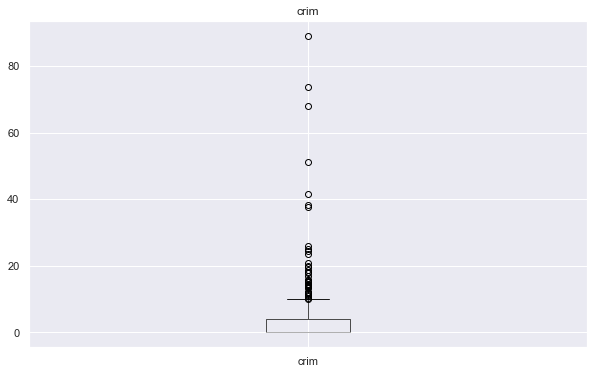

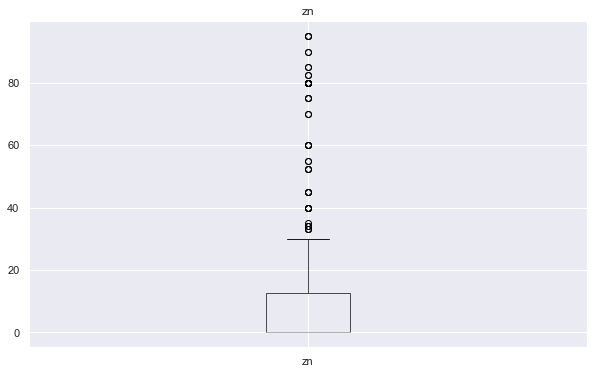

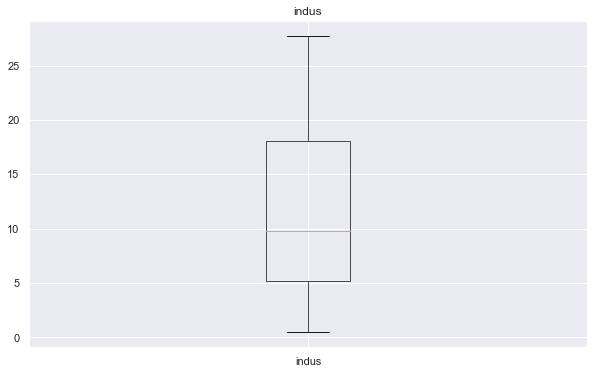

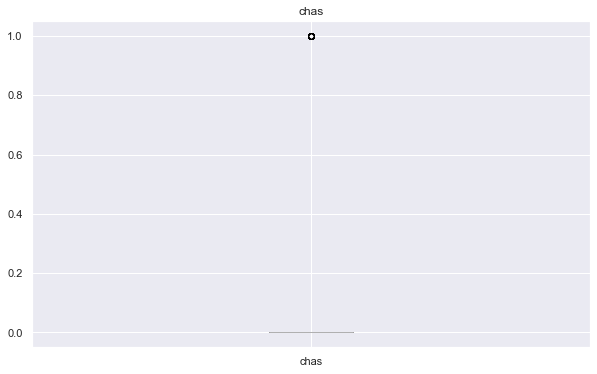

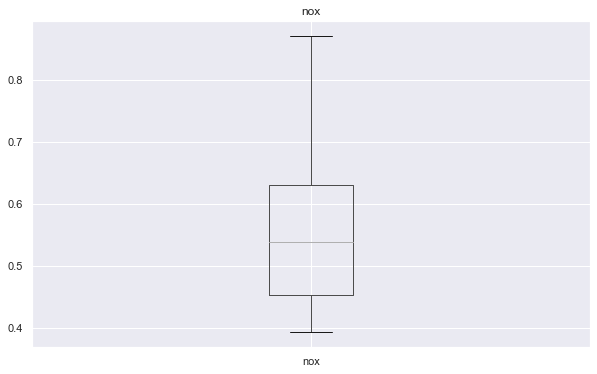

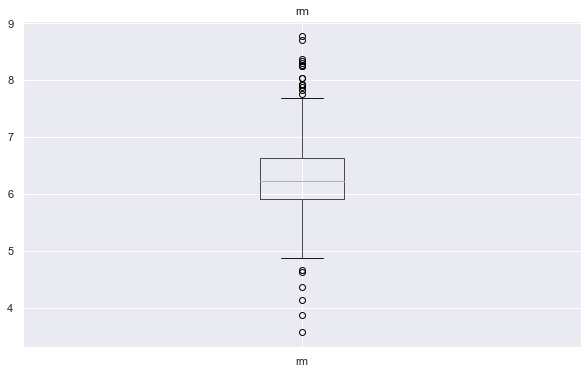

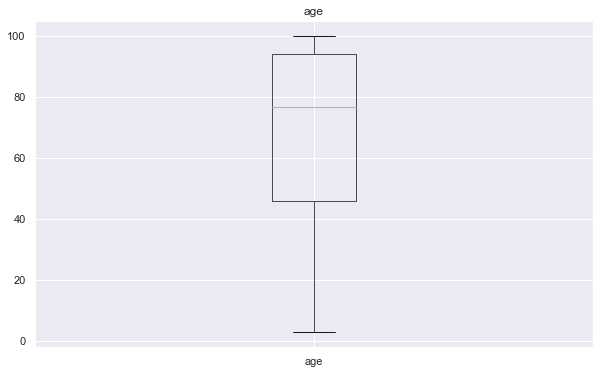

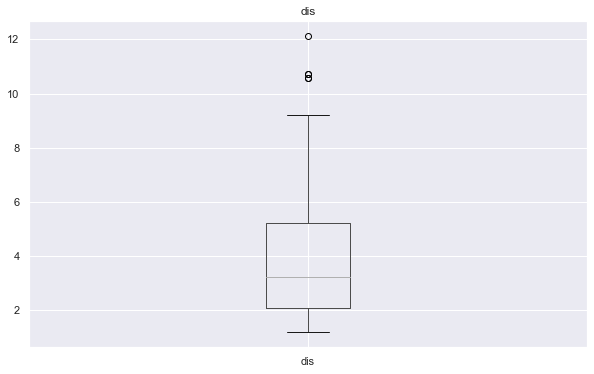

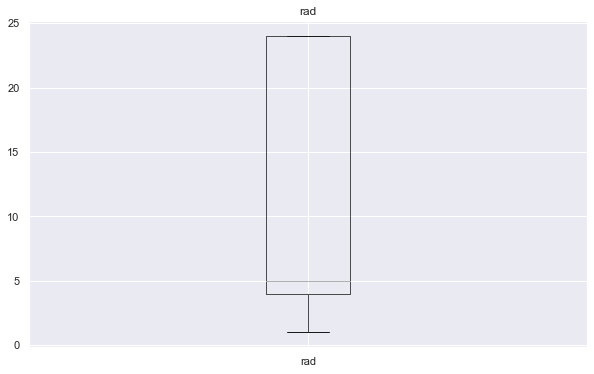

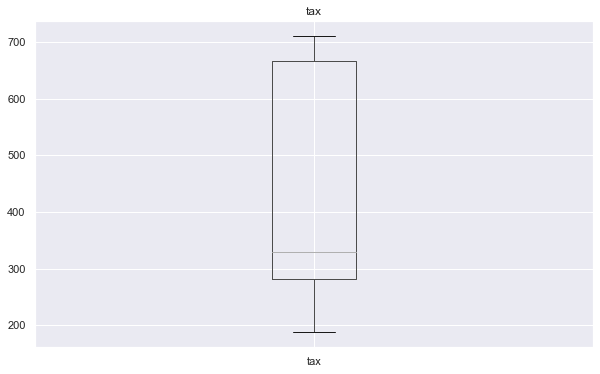

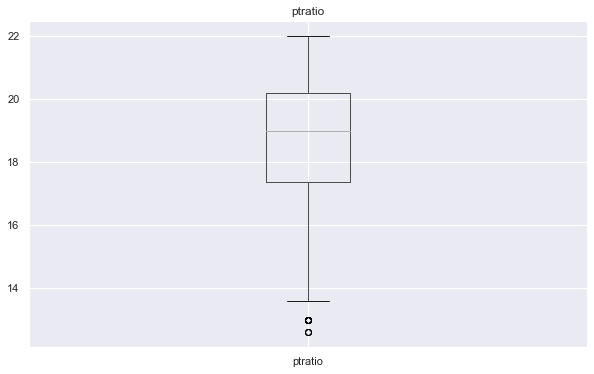

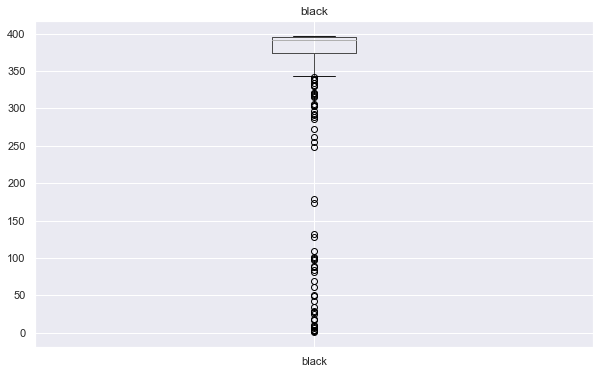

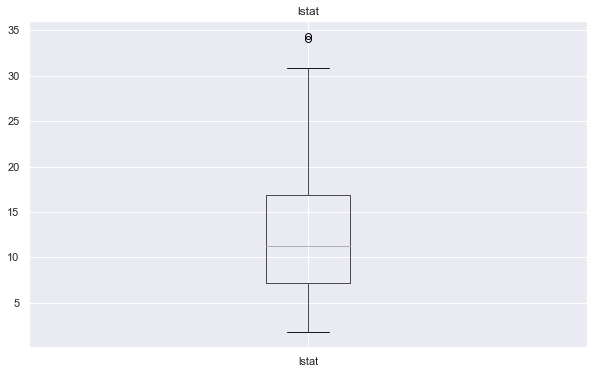

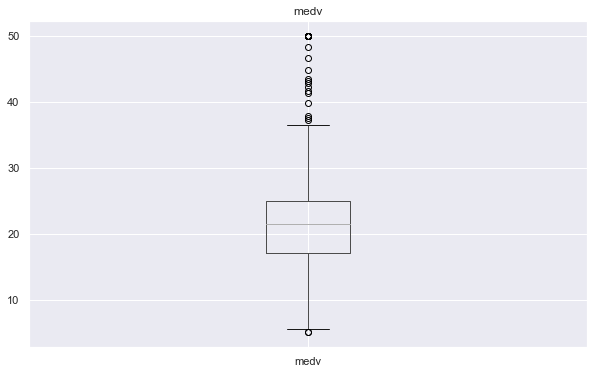

In [6]:
#Check Outliers
num_df = data.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    data.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [7]:
#We can see there are some outliers, we decide to drop them
data = data.drop(data[data['crim'] >40].index)
data = data.drop(data[data['zn'] > 40].index)
data = data.drop(data[data['chas'] >0.1].index)
data = data.drop(data[data['dis'] > 12].index)
data = data.drop(data[data['black'] < 200].index)

In [8]:
data.shape

(304, 14)

In [9]:
data['chas'].value_counts()

0.0    304
Name: chas, dtype: int64

In [10]:
data=data.drop(columns= ['chas'])

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

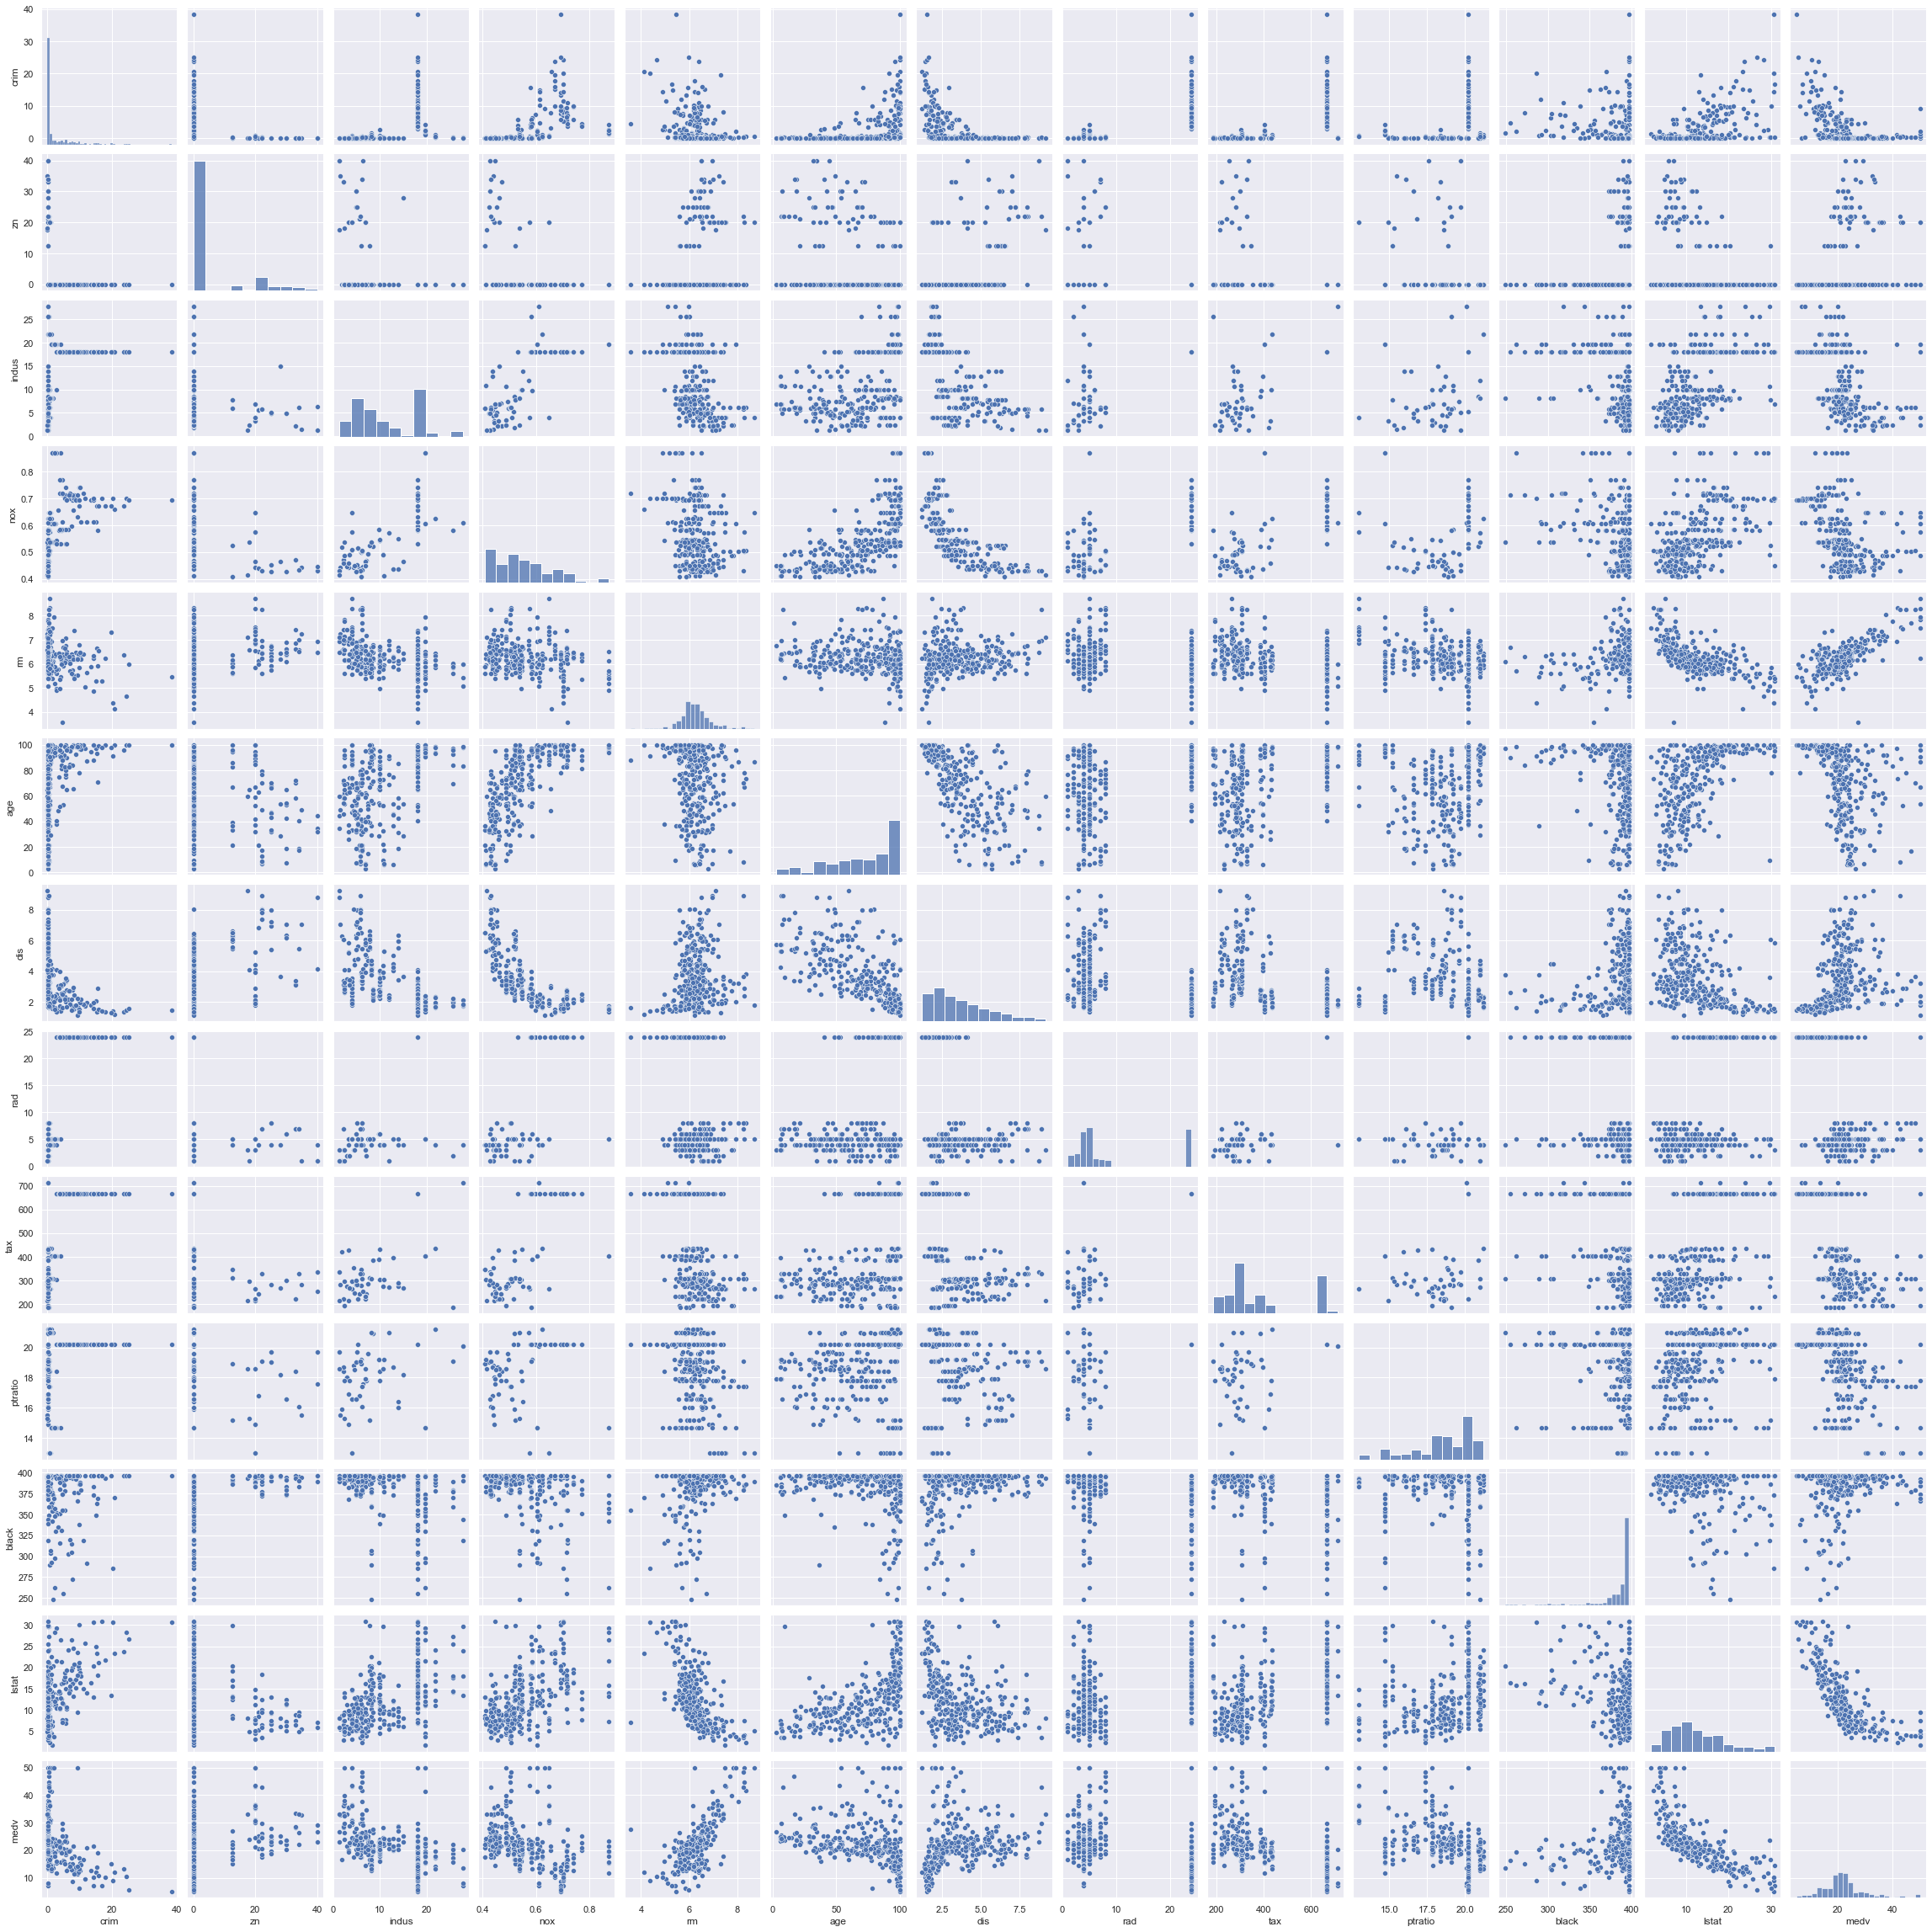

In [11]:
sns.pairplot(data)
plt.show()

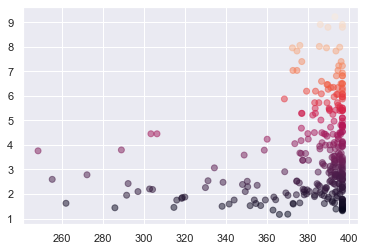

In [12]:
plt.scatter(data['black'], data['dis'], c=data['dis'], alpha=0.5)
plt.show()

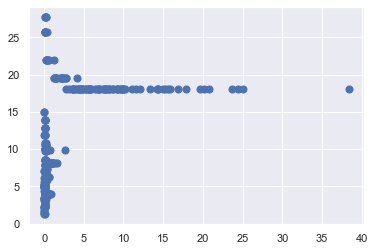

In [13]:
plt.scatter(data['crim'], data['indus'],  s=50)
#plt.scatter(x[:, 0], x[:, 1], s=50) FOR ARRAY
plt.show()



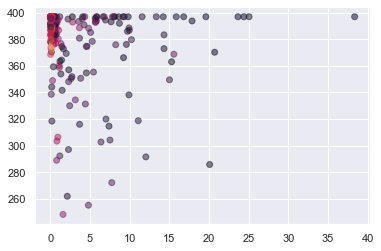

In [14]:
plt.scatter(data['crim'], data['black'], c=data['dis'], alpha=0.5)
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

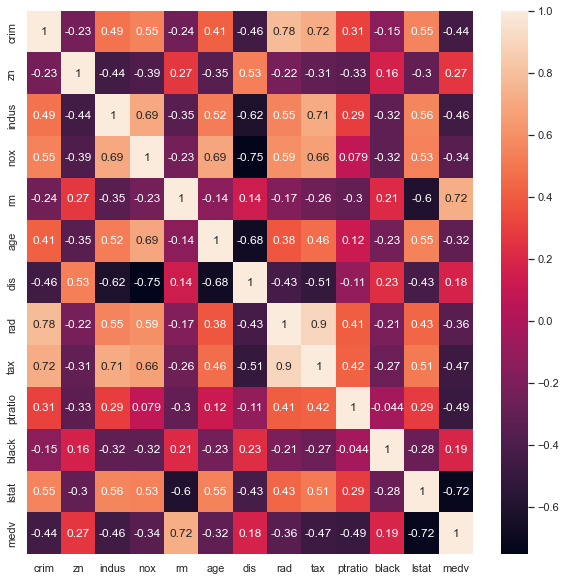

In [17]:

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(10,10))  
ax =sns.heatmap(data.corr(), annot=True)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [18]:
data.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,2.567715,4.847039,11.219375,0.554542,6.254868,69.886842,3.683134,9.078947,395.384868,18.584539,381.936118,12.539770,22.261513
std,5.050181,10.058843,6.630813,0.106295,0.653054,27.074056,1.842694,8.364254,166.708555,2.049807,26.181768,6.502274,8.119190
min,0.006320,0.000000,1.250000,0.409000,3.561000,2.900000,1.169100,1.000000,188.000000,13.000000,248.310000,1.730000,5.000000
25%,0.092625,0.000000,5.860000,0.467750,5.879750,50.725000,2.181375,4.000000,279.000000,17.800000,379.627500,7.537500,18.100000
50%,0.243125,0.000000,9.125000,0.538000,6.202000,76.600000,3.239250,5.000000,307.000000,19.100000,392.655000,11.265000,21.200000
75%,2.360625,0.000000,18.100000,0.614000,6.538500,94.525000,4.812200,8.000000,437.000000,20.200000,396.900000,16.312500,24.525000
max,38.351800,40.000000,27.740000,0.871000,8.704000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [19]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    print("r2_score:")
    print(r2_score(y_true, y_pred))
    

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [20]:
x = data.drop('medv', axis=1)
y = data.medv

#splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(243, 12)
(243,)
(61, 12)
(61,)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [25]:
from sklearn.ensemble import RandomForestRegressor

depth = [2, 4, 6, 8, 10]

for i in depth:
    rfr = RandomForestRegressor(max_depth=i, random_state=0)
    rfr.fit(x_train, y_train)
    y_pred = rfr.predict(x_test)
    

Now, plot the score for each tree on the training set and on the testing set.

In [24]:
# Produce a plot with the score for the testing and training for the different max depths
for i in depth:
    rfr = RandomForestRegressor(max_depth=i, random_state=0)
    rfr.fit(x_train, y_train)
    y_pred = rfr.predict(x_test)
    print(performance_metric(y_test, y_pred))

r2_score:
0.6677691804781578
None
r2_score:
0.7944070298529909
None
r2_score:
0.8188236417361079
None
r2_score:
0.8318610628874025
None
r2_score:
0.8358727306421536
None


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
R2 score getting better with hight depth

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [28]:
for i in [1, 11]:
    rfr = RandomForestRegressor(max_depth=i, random_state=0)
    rfr.fit(x_train, y_train)
    y_pred = rfr.predict(x_test)
    print(performance_metric(y_test, y_pred))

r2_score:
0.44752166480198186
None
r2_score:
0.8366261271614326
None


In [ ]:
it is better with 10, so there is good prediction and so low bias and low variance

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [31]:
for i in range(1, 50, 10):
    rfr = RandomForestRegressor(max_depth=i, random_state=0)
    rfr.fit(x_train, y_train)
    y_pred = rfr.predict(x_test)
    print(performance_metric(y_test, y_pred))

r2_score:
0.44752166480198186
None
r2_score:
0.8366261271614326
None
r2_score:
0.8287648196833048
None
r2_score:
0.8288593761882954
None
r2_score:
0.8288593761882954
None


In [ ]:
it is better wth 10, not only with hight depth

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

 assumption about black would be a vocubulary shocking, and it is not enought to describes quality of home and borough, it probabily fit better with city than with a rural city